# <h1><center>**Fake job Listing Detection**</center></h1>

### <h1><center>**Introduction**</center></h1>

#### Thier are lot of job advertising in internet even on reputed job advertising sites which never seems fake but after selection the so called recruiter startsasking for money and bank details many of the candidates fall into trap and lose a lot of money and the current job sometime so it really important to know that the advertisment posted for job is real or fake

### <h1><center>**Agenda**</center></h1>

#### Identify the fake job manually is very difficult and almost impossible hence we can apply **machine learning** to train a model for fake job classififcation it can be ttrained using the data of previous and fake job advertisements so that it can identify a fake job accurately in this prject we will first pre process raw data by **Tokenizing** and removing the **stop words** this pre process data will later be used to extract features using technique like **term frequency** and inverse **document frequency** to train the model we will be using **classififcation alogrithm** 

### <h1><center>**Project motive**</center></h1>

#### Nowadays their are lot of job scams beacause of unemployement there are a lot of websites that connect the recruiter to a suitable candidate sometimes a fake recruiter post a job posting on  job portal with a motvie to get money this problem occurs with many job portals later people shift to a new portal in search of real job but ther fake recruiter join this portal as well hence in todaysd world it is important to detect real and fake jobs for this project we will making use of **Natural language processing**

### Importing Libraries and install Modules

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer    # Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import TfidfVectorizer    #  the most common ways to extract numerical features from text content
from sklearn.preprocessing import LabelBinarizer   # one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.
from nltk.corpus import stopwords # Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. 
from nltk.stem.porter import PorterStemmer  # Porters Stemmer It is a type of stemmer which is mainly known for Data Mining and Information Retrieval. As its applications are limited to the English language only.
from wordcloud import WordCloud,STOPWORDS 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [4]:
#Using TensorFlow backend.

In [5]:
df = pd.read_csv("Fake Job detection sheet.csv")

In [6]:
df.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
# The mask() function is used to replace values where the condition is True. Where cond is False, keep the original value. Where True, replace with corresponding value from other.

C:\Users\user\AppData\Local\Temp\ipykernel_14244\1277190837.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)


<AxesSubplot:>

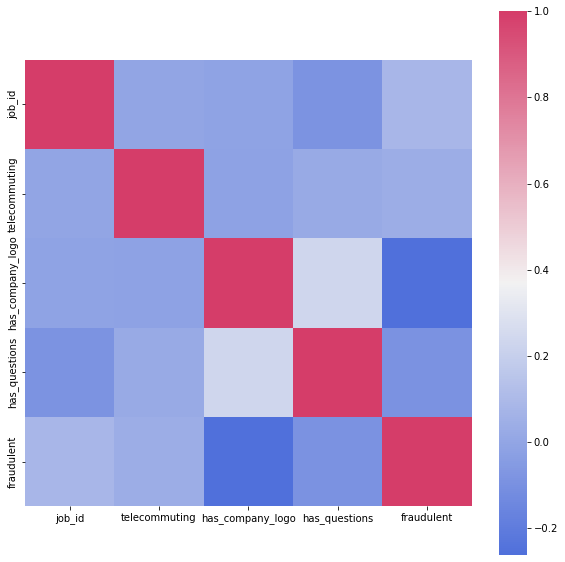

In [10]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [11]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [12]:
columns = ['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for col in columns:
    del df[col]

In [13]:
df.fillna(' ',inplace = True)  # though we are not removing the NAN values because we required rows for the futher analysis so we fullfill it by blank columns

### Compare fradulent and Non Fradulent Job Posting 

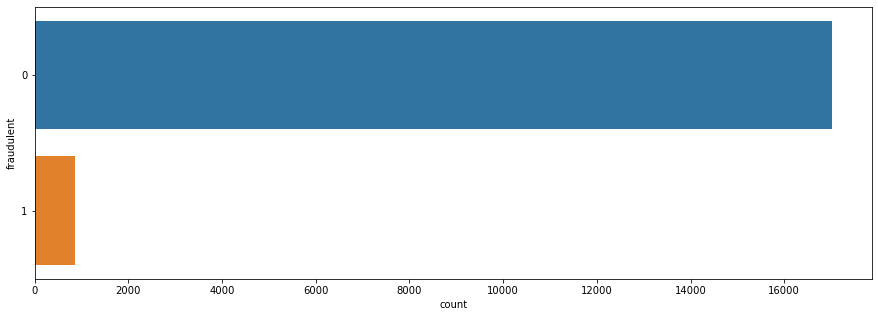

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()


### We have more Number of Non Fradulent as compare to Fradulant

In [15]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [16]:
exp = dict(df.required_experience.value_counts())
del exp[' ']

In [17]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

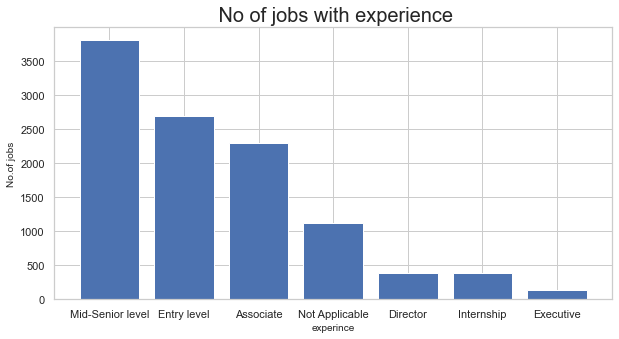

In [18]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title(" No of jobs with experience",size = 20)
plt.xlabel("experince", size = 10)
plt.ylabel("No.of jobs", size = 10)

plt.show()

### Mamimum Number of job posted requried Mid-Senior level position

### Thus we need to separate the coutry column 

In [19]:
def split(location):
    l = location.split(',')
    return l[0]
df['country'] = df.location.apply(split)

In [20]:
df.head(1)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US


### Analysing Number of Job posted for top 14 countries

In [21]:
countr = dict(df.country.value_counts()[:14])
del countr[' ']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

Text(0.5, 0, 'countries')

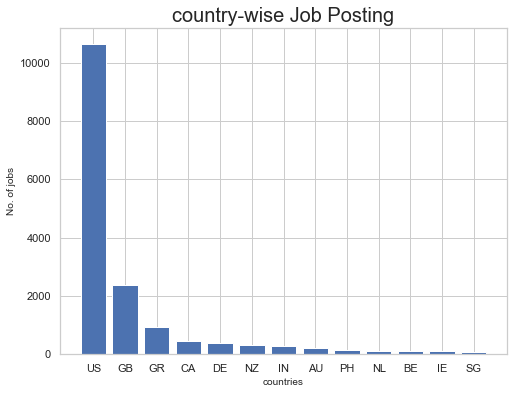

In [22]:
plt.figure(figsize = (8,6))
plt.title('country-wise Job Posting',size = 20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs', size = 10)
plt.xlabel('countries',size = 10)

### We have US as Maximum Number of Job Posting

In [23]:
edu = dict(df.required_education.value_counts()[:7])
del edu[' ']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'countries')

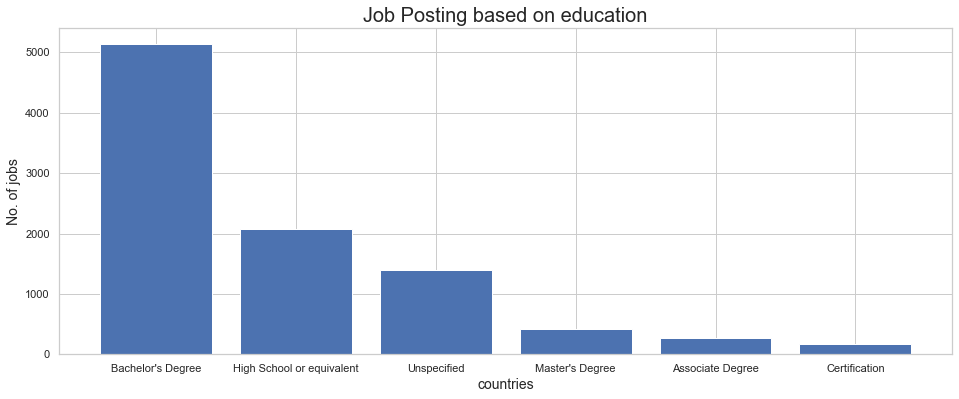

In [24]:
plt.figure(figsize = (16,6))
plt.title('Job Posting based on education',size = 20)
plt.bar(edu.keys(), edu.values())
plt.ylabel('No. of jobs', size = 14)
plt.xlabel('countries',size = 14)

In [25]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [26]:
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [27]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [28]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [29]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] 


In [30]:
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [31]:
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [32]:
df.head(1)

,title,location,department,company_profile,description,requirements,benefits,fraudulent,country,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,US,"Marketing Intern US, NY, New York Marketing We..."


In [33]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['country']


In [34]:
del df['benefits']
df.head(1)

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."


In [35]:
fraudjobs_text = df[df.fraudulent==1].text
real_text = df[df.fraudulent==0].text

In [36]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#### Stop words are words that are so common they are basically ignored by typical tokenizers. By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: “a”, “an”, “the”, “of”, “in”, etc. The stopwords in nltk are the most common words in data.

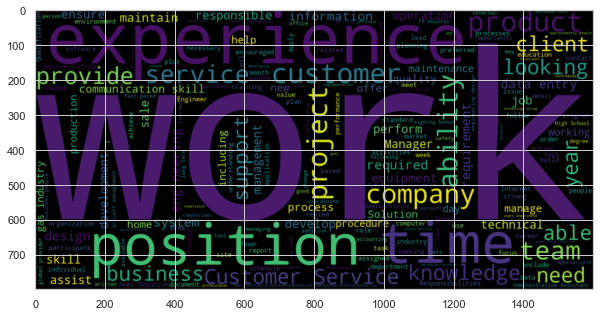

In [37]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (10,8))
wc = WordCloud(min_font_size = 3, max_font_size = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

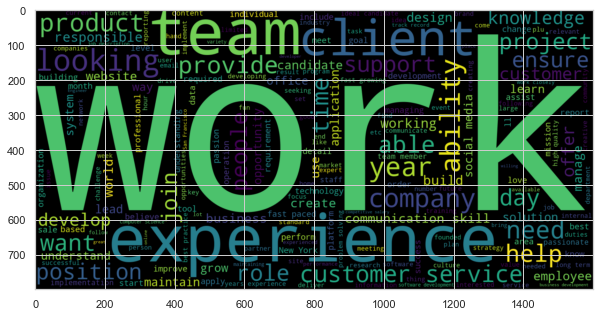

In [38]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (10,8))
wc = WordCloud(min_font_size = 3, max_font_size = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str(" ".join(real_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [39]:
!pip install spacy && python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
from sklearn.base import TransformerMixin

##### spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

#### A natural language parser is a program that figures out which group of words go together (as “phrases”) and which words are the subject or object of a verb. The NLP parser separates a series of text into smaller pieces based on the grammar rules.

#### Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'. For instance, lemmatizing the word 'Caring' would return 'Care'.

#### The strip() method in-built function of Python is used to remove all the leading and trailing spaces from a string.

In [41]:
punctuations = string.punctuation
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]   # PRON - MEANS PRONOUN 
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens
class predictors(TransformerMixin):
    def transform(self, x, y=None, **transform_params):
        return self 
    def get_params(self, deep = True):
        return{}
def clean_text(text):
    return text.strip().lower()


In [42]:
df['text'] = df['text'].apply(clean_text)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [44]:
import pandas as pd

#### In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [45]:
cv = TfidfVectorizer(max_features = 100)    # 100 most respeated words in the documents 
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(['text'], axis = 1, inplace = True)
main_df = pd.concat([df1,df], axis = 1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
main_df.head(1)

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.0,0.040692,0.0,0.041979,0.036106,0.0,0.747315,0.0,0.077832,0.0,...,0.0,0.0,0.184115,0.05045,0.06732,0.0,0.0,0.0,0.0,0


In [48]:
y = main_df.iloc[:,-1]     # fraudulent column
x = main_df.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 3,oob_score = True,n_estimators = 100,criterion = "entropy")
model = rfc.fit(x_train,y_train)

In [53]:
x_test

,ability,about,all,also,amp,an,and,are,as,at,...,well,who,will,with,work,working,world,years,you,your
9113,0.000000,0.037235,0.027976,0.115237,0.000000,0.023538,0.628381,0.089541,0.047480,0.082881,...,0.000000,0.240947,0.123345,0.112316,0.023082,0.061601,0.000000,0.029476,0.024918,0.000000
2660,0.000000,0.000000,0.000000,0.000000,0.178946,0.000000,0.400414,0.000000,0.000000,0.074818,...,0.000000,0.093218,0.000000,0.050695,0.062509,0.000000,0.000000,0.159652,0.134962,0.079805
13603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420132,0.000000,0.107933,0.000000,...,0.000000,0.000000,0.000000,0.425532,0.000000,0.140033,0.000000,0.000000,0.226573,0.267953
14737,0.000000,0.037654,0.028291,0.038844,0.167050,0.023803,0.448555,0.090549,0.192057,0.000000,...,0.073615,0.000000,0.024947,0.151440,0.023342,0.000000,0.039707,0.119231,0.100792,0.059600
215,0.167150,0.000000,0.112548,0.000000,0.186077,0.037877,0.713780,0.036022,0.210113,0.022229,...,0.000000,0.027695,0.000000,0.120492,0.130001,0.074346,0.000000,0.023716,0.060146,0.047420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.157622,0.000000,0.063680,0.000000,0.037601,0.026788,0.694126,0.050953,0.000000,0.031442,...,0.000000,0.000000,0.000000,0.213044,0.105078,0.000000,0.000000,0.000000,0.000000,0.000000
12485,0.032368,0.000000,0.183074,0.143638,0.000000,0.044008,0.397385,0.062780,0.022193,0.051654,...,0.000000,0.000000,0.161431,0.139997,0.021578,0.000000,0.000000,0.055111,0.069882,0.027548
6496,0.000000,0.214858,0.080716,0.000000,0.142981,0.067910,0.453246,0.064585,0.136988,0.039854,...,0.000000,0.148965,0.106761,0.054008,0.099892,0.000000,0.226575,0.000000,0.107837,0.085021
4782,0.000000,0.036885,0.000000,0.000000,0.000000,0.139898,0.604163,0.088699,0.047034,0.027367,...,0.000000,0.000000,0.000000,0.055630,0.022865,0.061022,0.000000,0.029199,0.000000,0.029191


In [54]:
pred = rfc.predict(x_test)
score = accuracy_score(y_test,pred)
score

0.9722222222222222

In [55]:
print("classification report")
print(classification_report(y_test,pred))
print("confusuin matrix")
print(confusion_matrix(y_test,pred))

classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5119
           1       0.99      0.40      0.57       245

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.78      5364
weighted avg       0.97      0.97      0.97      5364

confusuin matrix
[[5118    1]
 [ 148   97]]
